In [3]:
import os

# Changes the notebook working directory on level up.
#%cd ..

# Running main python script.
%run -i "src/main.py"




C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue


### Study how the catalog changes with the months:

##### Overall

In [21]:
new_df = data_set[["type","date_added"]].copy()
new_df = new_df[new_df.date_added != "Unknown date_added"] #Skip rows where date added is unkown
new_df

,type,date_added
0,Movie,"September 9, 2019"
1,Movie,"September 9, 2016"
2,TV Show,"September 8, 2018"
3,TV Show,"September 8, 2018"
4,Movie,"September 8, 2017"
...,...,...
6218,TV Show,"April 10, 2019"
6219,TV Show,"April 1, 2019"
6220,TV Show,"April 1, 2016"
6221,TV Show,"April 1, 2016"


In [25]:
#Get months and years for the overall data


new_df["year"] = new_df["date_added"].apply(lambda x: x.split(", ")[-1])  #Lambda: Iterates though every entry. Splits by comma and extracts the last value (which is year)
new_df["month"] = new_df["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
new_df


,type,date_added,year,month
0,Movie,"September 9, 2019",2019,September
1,Movie,"September 9, 2016",2016,September
2,TV Show,"September 8, 2018",2018,September
3,TV Show,"September 8, 2018",2018,September
4,Movie,"September 8, 2017",2017,September
...,...,...,...,...
6218,TV Show,"April 10, 2019",2019,April
6219,TV Show,"April 1, 2019",2019,April
6220,TV Show,"April 1, 2016",2016,April
6221,TV Show,"April 1, 2016",2016,April


In [63]:
months = ["January","February","March","April","May","June","July",
         "August","September","October","November","December"]
months_ordered = months[::-1]
#months_ordered

seasons = ["Winter","Spring","Summer","Autumn"]
#seasons

df = new_df.groupby("year")
df = df["month"].value_counts()
df = df.unstack()
df

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11.0,1.0
2012,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
2013,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,3.0,2.0
2014,2.0,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,4.0,1.0
2015,7.0,2.0,23.0,4.0,1.0,8.0,7.0,5.0,7.0,4.0,15.0,7.0
2016,23.0,44.0,98.0,16.0,44.0,31.0,19.0,19.0,14.0,47.0,53.0,48.0


In [68]:
df = df.fillna(0) #Fill the NaNs with 0.
df = df[months_ordered] #Sort the columns by the reversed months of the year 
df

month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2013,2.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2014,6.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0
2015,23.0,4.0,15.0,7.0,2.0,8.0,7.0,7.0,7.0,5.0,4.0,1.0
2016,98.0,47.0,53.0,48.0,44.0,31.0,19.0,14.0,23.0,19.0,16.0,44.0


Text(0, 0.5, 'Year')

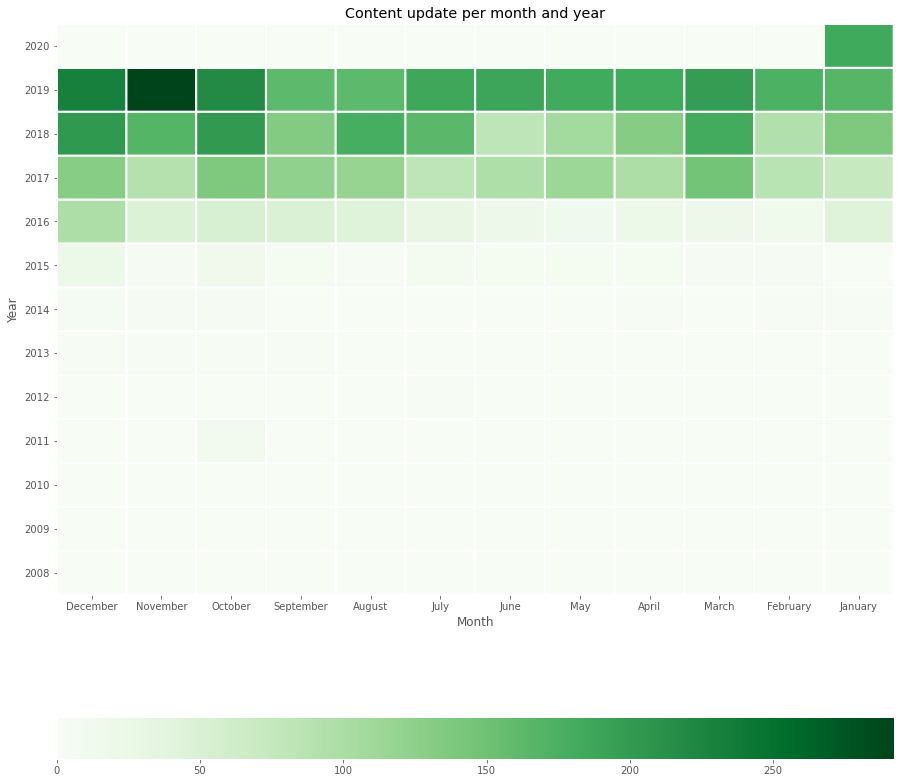

In [94]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
plt.figure(figsize=(15,15))
plt.pcolor(df, cmap="Greens", edgecolors = "white",linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.colorbar(orientation="horizontal")
plt.title("Content update per month and year")
plt.xlabel("Month")
plt.ylabel("Year")

We see that the amount of content update per month has been steadily increasing since the end of 2016. The figure also clearly indicated that November of 2019 was the month where the most contend were added. If the last total year of data (2019) is considered, we see that there less content beeing added in august and september. Therefore, adding data these months might increase the probability of success, as there is less competition among new content these months.

Now that we have an overall view of the added content on a per month basis, we can closer study when specific content is added to the catalogue:

In [97]:
df #Dataframe used in previous plot

month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2013,2.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2014,6.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0
2015,23.0,4.0,15.0,7.0,2.0,8.0,7.0,7.0,7.0,5.0,4.0,1.0
2016,98.0,47.0,53.0,48.0,44.0,31.0,19.0,14.0,23.0,19.0,16.0,44.0


In [107]:
df["Winter"] = df["December"] + df["January"] + df["February"]
df["Spring"] = df["March"] + df["April"] + df["May"]
df["Summer"] = df["June"] + df["July"] + df["August"]
df["Autumn"] = df["September"] + df["October"] + df["November"]
df_seasons = df[["Winter","Spring","Summer","Autumn"]].copy()
df_seasons

month,Winter,Spring,Summer,Autumn
year,,,,
2008,2.0,0.0,0.0,0.0
2009,0.0,1.0,0.0,1.0
2010,0.0,0.0,0.0,1.0
2011,0.0,1.0,0.0,12.0
2012,2.0,0.0,3.0,2.0
2013,2.0,2.0,1.0,7.0
2014,10.0,2.0,3.0,10.0
2015,28.0,19.0,17.0,26.0
2016,158.0,56.0,94.0,148.0


Text(0, 0.5, 'Year')

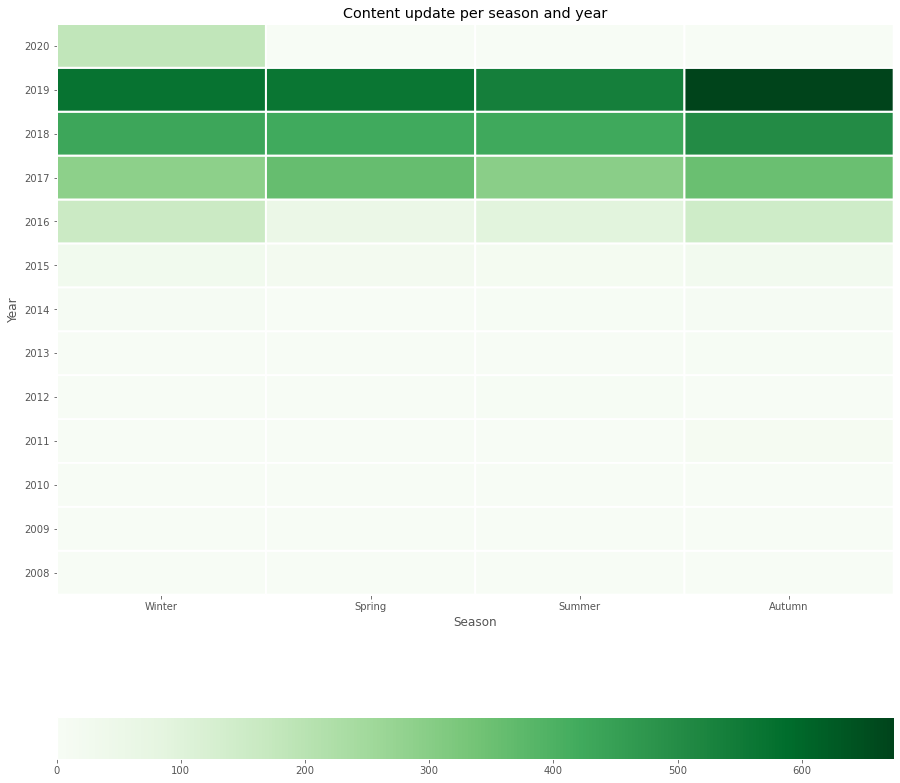

In [109]:
plt.figure(figsize=(15,15))
plt.pcolor(df_seasons, cmap="Greens", edgecolors = "white",linewidths=2)
plt.xticks(np.arange(0.5, len(df_seasons.columns), 1), df_seasons.columns)
plt.yticks(np.arange(0.5, len(df_seasons.index), 1), df_seasons.index)
plt.colorbar(orientation="horizontal")
plt.title("Content update per season and year")
plt.xlabel("Season")
plt.ylabel("Year")

For both 2018 and 2019, more content is added during autumn when compared to the other seasons. This season marks the arrival of cooler temperatures in large parts of Europe and North-America. Therefore, one might expect that more people are tuning on to Netflix during this season, compared to the summer season. However, this is only speculations as the dataset does not provide information about use. 

### Patterns in content and seasons of the year:

Now that we have an overall view of the seasonal additions of content to the netflix catalogue, we can focus our attention to study if there are any patterns in content and seasons of the year. To do this, we start by studying some selected content and see if there are any patterns to when more content is added to the catalogue. The first two obvious keywords to study and see if there are any relation between seasons and content adding are christmas related (should be added during autumn/winter) and horror related linked to halloween (should be added during fall). 

##### Christmas

Since christmas is not defined as a category in itself, all the content with the word christmas in the description column is defined as christmas movies:

In [25]:
#Find all x-mas movies:
#df_xmas = data_set[data_set['description'].str.contains("Christmas")]
df_xmas = data_set[["date_added","description"]].copy()
df_xmas = df_xmas[df_xmas["description"].str.contains("Christmas")]
df_xmas = df_xmas[df_xmas["date_added"] != "Unknown date_added"] #Remove any unknown dates.

df_xmas

,date_added,description
486,"October 3, 2018","While on a press tour, Benji goes behind the s..."
844,"October 1, 2019","Five disparate kids, snowed in at the airport ..."
1013,"November 8, 2019",A snowstorm hits a small town on a cold Christ...
1060,"November 30, 2018",A trip to church with her family on Christmas ...
1083,"November 29, 2019","It's everything you love about ""Sugar Rush"" – ..."
1088,"November 28, 2019",A widowed radio DJ and his four spoiled kids n...
1091,"November 28, 2019",A struggling LA musician tries to win over his...
1106,"November 26, 2019","It's Christmas Eve in Pitchfork Pines, and the..."
1144,"November 22, 2018","After accidentally crashing Santa's sleigh, a ..."
1174,"November 20, 2019",A Christmas reunion becomes a gateway to the p...


In [26]:
df_xmas["year"] = df_xmas["date_added"].apply(lambda x: x.split(", ")[-1])  #Lambda: Iterates though every entry. Splits by comma and extracts the last value (which is year)
df_xmas["month"] = df_xmas["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
df_xmas


,date_added,description,year,month
486,"October 3, 2018","While on a press tour, Benji goes behind the s...",2018,October
844,"October 1, 2019","Five disparate kids, snowed in at the airport ...",2019,October
1013,"November 8, 2019",A snowstorm hits a small town on a cold Christ...,2019,November
1060,"November 30, 2018",A trip to church with her family on Christmas ...,2018,November
1083,"November 29, 2019","It's everything you love about ""Sugar Rush"" – ...",2019,November
1088,"November 28, 2019",A widowed radio DJ and his four spoiled kids n...,2019,November
1091,"November 28, 2019",A struggling LA musician tries to win over his...,2019,November
1106,"November 26, 2019","It's Christmas Eve in Pitchfork Pines, and the...",2019,November
1144,"November 22, 2018","After accidentally crashing Santa's sleigh, a ...",2018,November
1174,"November 20, 2019",A Christmas reunion becomes a gateway to the p...,2019,November


In [32]:
xmas_df = df_xmas.groupby("year")
xmas_df = xmas_df["month"].value_counts()
xmas_df = xmas_df.unstack()
xmas_df = xmas_df.fillna(0)
xmas_df

month,April,December,February,January,July,June,March,November,October
year,,,,,,,,,
2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,3.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0
2017,0.0,5.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0
2018,0.0,5.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0
2019,0.0,8.0,0.0,1.0,0.0,2.0,1.0,7.0,1.0
2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xmas_df 

In [35]:
xmas_df["Winter"] = xmas_df["December"] + xmas_df["January"] + xmas_df["February"]
xmas_df["Spring"] = xmas_df["March"] + xmas_df["April"] #+ xmas_df["May"]
xmas_df["Summer"] = xmas_df["June"] + xmas_df["July"] #+ xmas_df["August"]
xmas_df["Autumn"] = xmas_df["October"] + xmas_df["November"]
df_seasons = xmas_df[["Winter","Spring","Summer","Autumn"]].copy()
df_seasons

month,Winter,Spring,Summer,Autumn
year,,,,
2013,0.0,1.0,0.0,1.0
2014,3.0,0.0,0.0,0.0
2015,1.0,0.0,0.0,0.0
2016,8.0,0.0,0.0,1.0
2017,6.0,1.0,2.0,2.0
2018,5.0,2.0,0.0,5.0
2019,9.0,1.0,2.0,8.0
2020,1.0,0.0,0.0,0.0


Text(0, 0.5, 'Year')

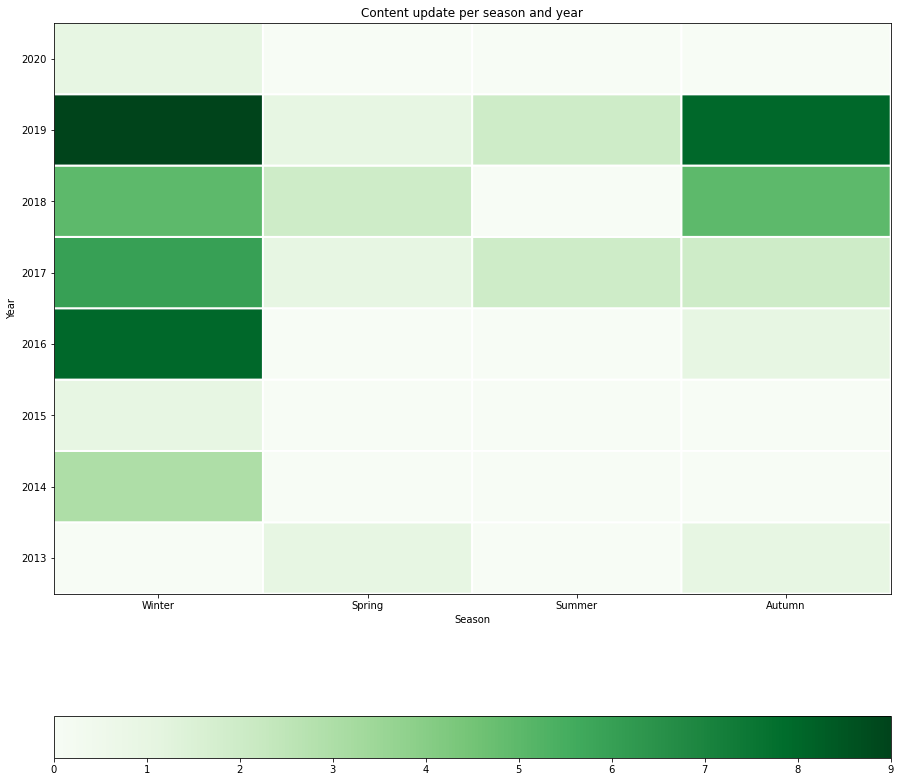

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
plt.pcolor(df_seasons, cmap="Greens", edgecolors = "white",linewidths=2)
plt.xticks(np.arange(0.5, len(df_seasons.columns), 1), df_seasons.columns)
plt.yticks(np.arange(0.5, len(df_seasons.index), 1), df_seasons.index)
plt.colorbar(orientation="horizontal")
plt.title("Content update per season and year")
plt.xlabel("Season")
plt.ylabel("Year")

##### Movies only

##### TV Shows only

### Study how the catalog changes with the seasons:

##### Overall

##### Movies only

##### TV Shows only

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
